In [1]:
import pyAMARES

pyAMARES.__version__

/home/xujia/miniconda3/envs/mrs/lib/python3.12/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


'0.3.23dev'

# Examples of In Vivo X-Nuclei ($^{129}$Xe and $^{2}$H) MRS Fitting
- Reproduce Figures 2B, C and Figures S2C, D of the [pyAMARES publication](https://doi.org/10.3390/diagnostics14232668)

**[Try this tutorial on Google Colab!](https://colab.research.google.com/drive/1HGFB0G0NuHxpa2lfUAx-_sGkKx7QwVeO)**

## Fitting a Voxel of Hyperpolarized $^{129}$Xe MRSI Acquired from Healthy Porcine Lungs at 3T 
- **Set Scanner Parameters**:
    - **MHz (Field Strength)**: 35.340772 MHz, corresponding to $^{129}$Xe at 3T
    - **sw (Spectral Width)**: 20000 Hz
    - **Deadtime**: 7.14e-05 seconds

In [2]:
MHz = 35.340772
sw = 20000
begin_time = 7.14e-05

- **Load the FID of an Example Voxel of** $^{129}$Xe MRSI

In [3]:
fid = pyAMARES.readmrs("a_voxel_Xe.txt")

Try to load 2-column ASCII data
data.shape= (256,)


- **Initialize the FID Object**

Checking comment lines in the prior knowledge file
Parameter g will be fit with the initial value set in the file FigS2A.csv


/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:314: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pk = pk.applymap(
/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:315: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  lambda x: pd.to_numeric(x, errors="ignore")
/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:86: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")
/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:174: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '125.66370614359172' has dtype incompatible with int64, please explicitly cast to a com

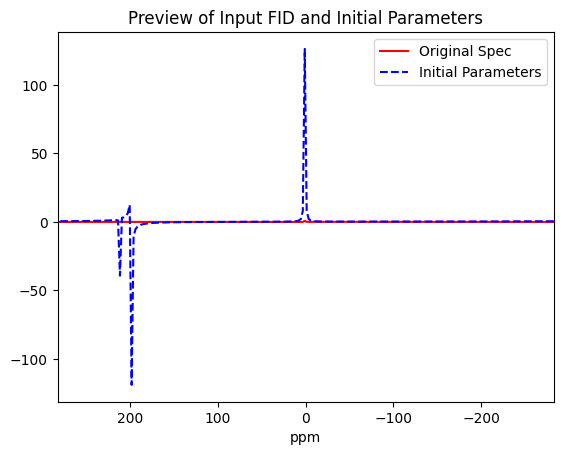

Printing the Prior Knowledge File FigS2A.csv


,Gas,Membrane,RBC
Index,,,
Initial Values,NaN,NaN,NaN
amplitude,1,0.6,0.2
chemicalshift,0,197,210
linewidth,40,10,10
phase,0,0,Membrane
g,0,0.1,0
Bounds,NaN,NaN,NaN
amplitude,"(0,","(0,","(0,"
chemicalshift,"(-25,25)","(192, 205)","(200,215)"


In [4]:
# Initialize an FIDobj using the loaded fid and spectral parameters
FIDobj = pyAMARES.initialize_FID(
    fid,
    priorknowledgefile="FigS2A.csv",  # Prior knowledge file for hyperpolarized 129Xe
    MHz=MHz,
    sw=sw,
    deadtime=begin_time,
    preview=True,
    g_global=False,
)  # When g_global is False, the lineshape parameter `g` will be fitted based on prior knowledge constraints

- Note: In the prior knowledge dataset, **the gas and red blood cell (RBC) signals are modeled with Lorentzian lineshapes (g = 0), while the membrane signal is modeled with a Voigt lineshape (initial value: g = 0.1)** to account for its structural heterogeneity. This approach has become widely accepted in the xenon MRS community for quantifying membrane and RBC signals [Bier et al., NMR Biomed. 2019](https://doi.org/10.1002/nbm.4029)

- **First Round of Fitting: Parameter Optimization**

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 7.601e-08
Fitting with method=leastsq took 0.226462 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
a_sd is all None, use crlb instead!
freq_sd is all None, use crlb instead!
lw_sd is all None, use crlb instead!
phase_sd is all None, use crlb instead!
g_std is all None, use crlb instead!
It seems that zeros are padded after 85
Remove padded zeros from residual estimation!
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 1000
Reduced chi-squared (redchi): 1.2802058149337869e-07
Fit success status: Failure
Fit message: Tolerance seems to be too small. Could not estimate error-bars.
Norm of residual = 0.000
Norm of the data = 0.000
resNormSq / dataNormSq = 0.439


/home/xujia/gitlab/pyAMARES/pyAMARES/util/crlb.py:54: RuntimeWarning: Warning: The matrix may be ill-conditioned. Condition number is high: 7.448e+17
  warnings.warn(


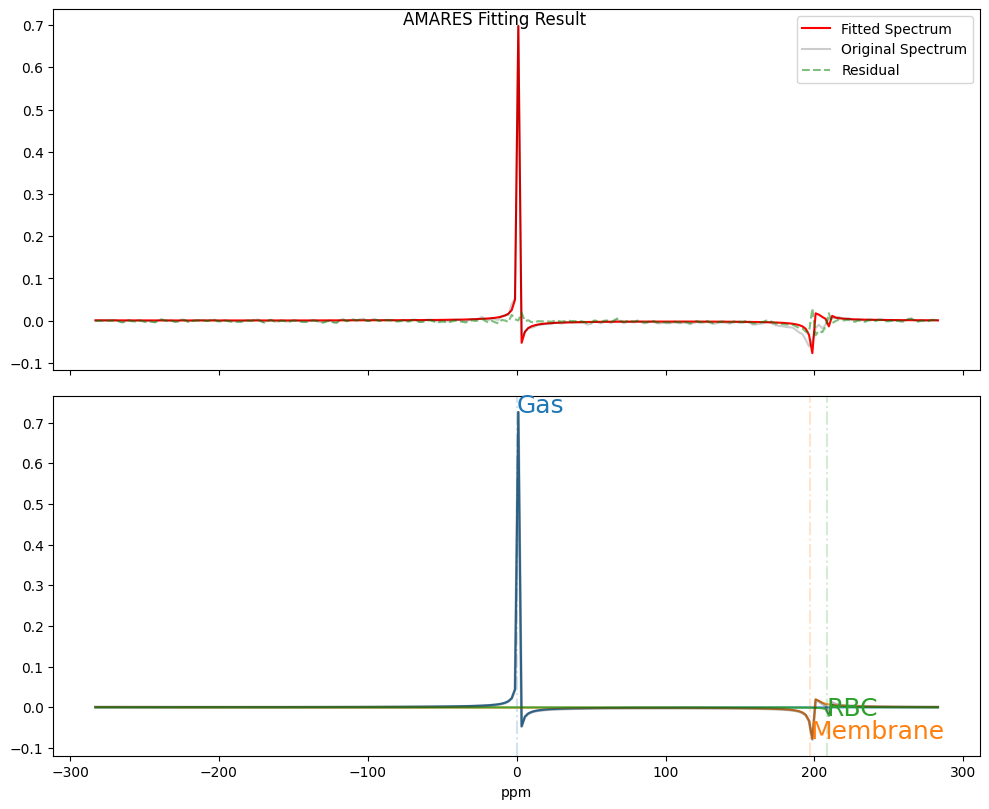

In [5]:
out1 = pyAMARES.fitAMARES(
    fid_parameters=FIDobj,
    fitting_parameters=FIDobj.initialParams,
    method="leastsq",  # Initialize parameters using the Levenberg-Marquardt method
    ifplot=True,
    inplace=False,
)

- **Optimized Fitting Parameters**

In [6]:
out1.fittedParams

name,value,initial value,min,max,vary,expression
ak_Gas,0.00419796,1.0,0.00000000,inf,True,
freq_Gas,2.23054615,0.0,-883.519300,883.519300,True,
dk_Gas,92.1505526,125.66370614359172,0.00000000,inf,True,
phi_Gas,-0.78507950,0.0,-3.14159265,3.14159265,True,
g_Gas,0.79416119,0.0,0.00000000,1.00000000,True,
ak_Membrane,0.00113109,0.6,0.00000000,inf,True,
freq_Membrane,6975.20728,6962.132084,6785.42822,7244.85826,True,
dk_Membrane,228.315725,31.41592653589793,0.00000000,628.318531,True,
phi_Membrane,-0.89372042,0.0,-3.14159265,3.14159265,True,
g_Membrane,1.9714e-06,0.1,0.00000000,1.00000000,True,


- **Fix Lineshape Parameters of Gas and RBC for the AMARES Fitting**

In [7]:
out1.fittedParams["g_Gas"].vary = False
out1.fittedParams["g_RBC"].vary = False

In [8]:
out1.fittedParams

name,value,initial value,min,max,vary,expression
ak_Gas,0.00419796,1.0,0.00000000,inf,True,
freq_Gas,2.23054615,0.0,-883.519300,883.519300,True,
dk_Gas,92.1505526,125.66370614359172,0.00000000,inf,True,
phi_Gas,-0.78507950,0.0,-3.14159265,3.14159265,True,
g_Gas,0.79416119,0.0,0.00000000,1.00000000,False,
ak_Membrane,0.00113109,0.6,0.00000000,inf,True,
freq_Membrane,6975.20728,6962.132084,6785.42822,7244.85826,True,
dk_Membrane,228.315725,31.41592653589793,0.00000000,628.318531,True,
phi_Membrane,-0.89372042,0.0,-3.14159265,3.14159265,True,
g_Membrane,1.9714e-06,0.1,0.00000000,1.00000000,True,


- **Fitting AMARES Using Levenberg-Marquardt-Initialized Parameters:**

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 7.601e-08
Fitting with method=least_squares took 0.061504 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
It seems that zeros are padded after 85
Remove padded zeros from residual estimation!
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 143
Reduced chi-squared (redchi): 3.988245517500423e-08
Fit success status: Success
Fit message: `gtol` termination condition is satisfied.
Norm of residual = 0.000
Norm of the data = 0.000
resNormSq / dataNormSq = 0.137


/home/xujia/gitlab/pyAMARES/pyAMARES/util/crlb.py:54: RuntimeWarning: Warning: The matrix may be ill-conditioned. Condition number is high: 3.007e+18
  warnings.warn(


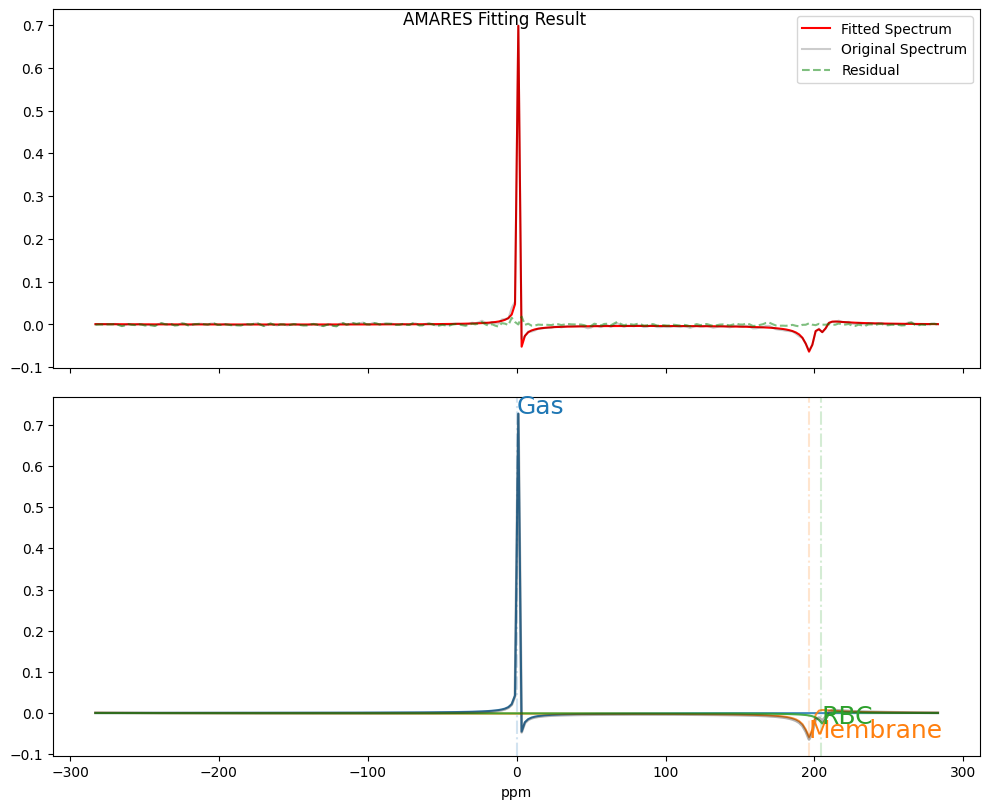

In [9]:
out2 = pyAMARES.fitAMARES(
    fid_parameters=out1,
    fitting_parameters=out1.fittedParams,  # Fit Xenon data using optimized parameters with fixed g_Gas and g_RBC
    method="least_squares",
    ifplot=True,
    inplace=False,
)

- **Visualization of AMARES Fitting as shown in Figure 2B** of [pyAMARES Publication](https://doi.org/10.3390/diagnostics14232668)

In [10]:
# Modify the visualization parameters
plotParameters = out2.plotParameters
plotParameters.xlim = (300, -300)  # Show spectrum from 300 to -300 ppm
plotParameters.ifphase = False  # Do not apply phase correction
plotParameters.lb = 5  # Apply line broadening of 5 Hz for visualization

fitting_parameters is None, just use the fid_parameters.out_obj.params


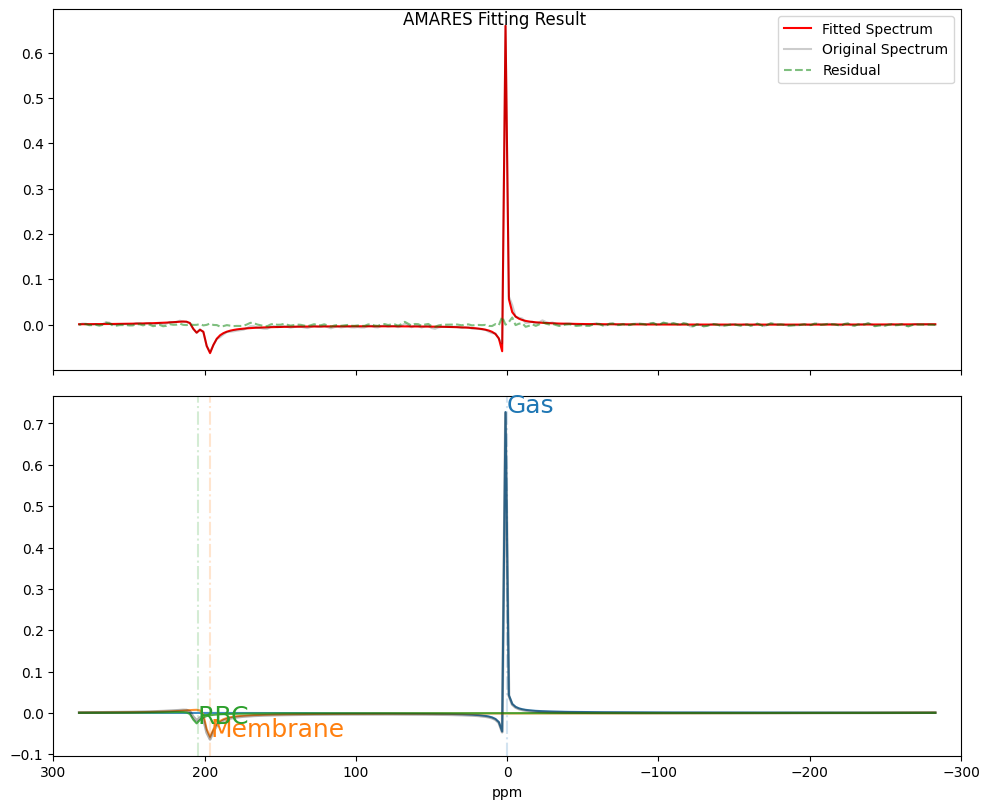

In [11]:
pyAMARES.plotAMARES(out2, plotParameters=plotParameters)

- **Obtained Fitting Results Spreadsheet as shown in Figure S2C** of [pyAMARES Publication](https://doi.org/10.3390/diagnostics14232668)

In [12]:
out2.simple_df

,amplitude,chem shift(ppm),LW(Hz),phase(deg),SNR,CRLB(%)
name,,,,,,
Gas,0.004,0.062,28.050,-44.826,10.156,0.485
Membrane,0.002,196.126,200.000,-39.205,5.351,4.801
RBC,0.001,204.615,200.000,-39.205,2.163,12.419


- **Obtained Fitting Results Spreadsheet as shown in Figure S2D** of [pyAMARES Publication](https://doi.org/10.3390/diagnostics14232668)

In [26]:
out1.simple_df

,amplitude,chem shift(ppm),LW(Hz),phase(deg),SNR,CRLB(%)
name,,,,,,
DHO,0.004,-0.090,39.679,-19.241,2.361,4.619
Glucose,0.001,-1.052,30.113,-19.241,0.682,13.969
Glx,0.002,-2.571,60.789,-19.241,1.088,19.562
Lactate,0.001,-3.733,100.000,-19.241,0.476,54.700
